In [1]:
import urllib.request
from bs4 import BeautifulSoup
import time
import konlpy.tag
import re
#먼저 pip install kornounextractor
from kornounextractor.noun_extractor import extract
from collections import Counter
import networkx as nx
import itertools

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib.request
import requests
from ckonlpy.tag import Twitter
import konlpy.tag
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import networkx as nx
from kornounextractor.noun_extractor import extract
#from kr_sna_c import do_kr_sna
from matplotlib import rcParams
import matplotlib.font_manager as fm
import itertools

In [2]:
#원하는 조건의 기사 url 모두 수집
url_index=[0,2,4,6,8,10,12,14,16,18]
url_zip=[]
for i in range(100):
    url='http://search.hani.co.kr/Search?command=query&keyword=%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80&media=news&sort=d&period=all&datefrom=2017.05.30&dateto=2018.11.30&pageseq='+str(i)
    r=urllib.request.urlopen(url)
    soup = BeautifulSoup(r.read(), 'lxml')
    for j in url_index:
        url_zip.append(soup.find_all('dt')[j].a.get('href'))

In [3]:
#기사내용 읽어오는 함수
def get_article(url):
    r=urllib.request.urlopen(url)
    soup = BeautifulSoup(r.read(), 'lxml')
    news_content = soup.find('div', attrs = {'class':'text'}).text
    #텍스트전처리
    news_content=news_content.strip()
    filtered_content=re.sub(r'[^\s\d\w\.\?\!\,]','',news_content)
    return filtered_content

In [4]:
#전체기사 텍스트병합
whole_text=''
for i in range(len(url_zip)):
    whole_text=whole_text+' '+get_article(url_zip[i])
whole_text=whole_text.replace('\n',' ').replace('\r',' ')

In [8]:
twitter = Twitter()

C:\Users\1411036\Anaconda3\anaconda\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [10]:
## 빈도분석을 위한 함수 생성
def cntWord(text , n = None):
    
    text= text.replace('차량 2부제','차량2부제')
    
    twitter.add_dictionary('차량2부제','Noun')
    twitter.add_dictionary('문재인','Noun')
    twitter.add_dictionary('발전소','Noun')
    twitter.add_dictionary('중국발','Noun')
    twitter.add_dictionary('스모그','Noun')
  
    
    ## 포스 태깅
    twitter_morphs = twitter.pos(text)
    ## 명사 동사 형용사만 추출
    Noun_words = []
    for word, pos in twitter_morphs:
        #if pos == 'Noun' or pos == 'Verb'or pos == 'Adjective':
        if pos == 'Noun':
            Noun_words.append(word)
    ## 불용어 사전을 등록 후 불용어 제거
    stopwords =['뉴스','까지','부터','면서','기자','도록','들의','이나','네이버','한겨례','연합뉴스','com','kr','후보','조금','위해','경기','강원','경기도','우리','대한','이상','지난','때문','나타','통해','대부분','매우','가운데','겨우','경우','대해','가장','관련','보통','이번','기온','구름','서울','거나','모든','전날','사이','맑음','아침','오후','오전','물결','일부','서울시']
    unique_Noun_words = set(Noun_words)
    for word in unique_Noun_words:
        if word in stopwords:
            while word in Noun_words: Noun_words.remove(word)
    ## 한글자 명사의 경우 뜻을 가진 경우가 많지 않으므로 제거
    for word in unique_Noun_words:
        if len(word)==1:
            while word in Noun_words: 
                Noun_words.remove(word)
    c = Counter(Noun_words)
    if n == None:
        return c.most_common(len(c))
    else:
        return c.most_common(n)

In [11]:
print(cntWord(whole_text,100))

[('미세먼지', 3173), ('지역', 1194), ('농도', 1181), ('바다', 1045), ('수준', 948), ('전국', 777), ('환경', 775), ('정책', 771), ('정부', 684), ('도로', 682), ('최고', 679), ('한국', 665), ('대기', 641), ('서해', 640), ('앞바다', 639), ('시민', 632), ('문제', 605), ('동해', 589), ('예상', 580), ('내륙', 573), ('남해', 573), ('관리', 555), ('예보', 546), ('사람', 543), ('사업', 543), ('시간', 537), ('바람', 534), ('최저', 529), ('안전', 498), ('대책', 486), ('배출', 481), ('국민', 473), ('영향', 470), ('사회', 455), ('기준', 452), ('환경부', 449), ('중심', 434), ('전망', 433), ('건강', 430), ('유의', 428), ('시장', 422), ('수도권', 415), ('계획', 415), ('중국', 402), ('강하', 392), ('제공', 383), ('기상청', 379), ('시행', 374), ('인천', 372), ('발전', 362), ('경제', 360), ('차량', 351), ('지원', 349), ('아이', 346), ('권역', 346), ('결과', 344), ('대통령', 344), ('발생', 343), ('에너지', 342), ('보이', 340), ('물질', 333), ('안개', 332), ('확대', 332), ('산업', 327), ('석탄', 321), ('개발', 320), ('시설', 317), ('올해', 316), ('남부', 313), ('발표', 312), ('당분간', 311), ('의원', 311), ('시작', 310), ('공기', 308), ('필요', 308), ('도시', 304)

In [ ]:
final_nouns=cntWord(whole_text,100)
final_nouns

In [ ]:
print(cntWord(whole_text,100))

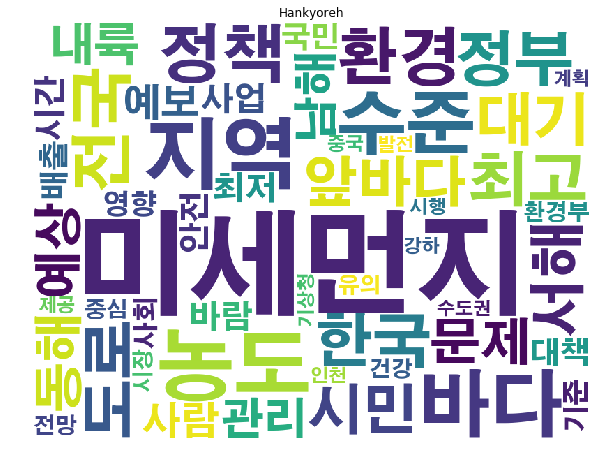

In [12]:
tags = cntWord(whole_text,50)
font_path = 'C:\Windows\Fonts\H2GTRE.TTF'
wc = WordCloud(font_path=font_path, background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.title('Hankyoreh')
plt.imshow(cloud)

In [ ]:
## 네트워크의 노드를 구성할 단어 선택
subject = ['미세먼지']
korea = ['한국','내륙','차량','대통령','안개','석탄','시설']
china = ['중국','남해','서해','앞바다','바람']
list_of_words = subject + korea + china

In [14]:
## 네트워크의 노드를 구성할 단어 선택
subject=['미세먼지']
korea=['발전소', '경유', '석탄', '차량']
china=['황사', '중국발', '중국', '스모그']
solution_korea=['정책','정부','대통령','차량2부제']
solution_china=['개인', '마스크']
list_of_words = subject + korea + china+ solution_korea + solution_china

In [ ]:
def netwk(content, sword):
    stopwords = 
    from konlpy.tag import Komoran
    komoran= Komoran()
    
    Nouns = komoran.nouns(content)
    final_nouns = Nouns.copy()
    unique_nouns = set(Nouns)
    
    for word in unique_nouns:
        if len(word) == 1:
            while word in final_nouns:
                final_nouns.remove(word)
        if word in stopwords:
            while word in final_nouns:
                final_nouns.remove(word)
                
    g = do_kr_sna(content, final_nouns, stopwords,list_of_words = list_of_words, userdic= False)
    
    yghDict = dict(g[sword])
    
    cntlst = []
    for k in yghDict.keys():
        cntlst.append([k,yghDict[k]['weight']])
    
    return sorted(cntlst, key= lambda x : -x[1])

In [ ]:
print(netwk(whole_text,'미세먼지'))

In [ ]:
stopwords = ['뉴스','까지','부터','면서','기자','도록','들의','이나','네이버','한겨례','연합뉴스','com','kr','후보','조금','위해','경기','강원','경기도','우리','대한','이상','지난','때문','나타','통해','대부분','매우','가운데','겨우','경우','대해','가장','관련','보통','이번']

In [15]:
stopwords =['뉴스','까지','부터','면서','기자','도록','들의','이나','네이버','한겨례','연합뉴스','com','kr','후보','조금','위해','경기','강원','경기도','우리','대한','이상','지난','때문','나타','통해','대부분','매우','가운데','겨우','경우','대해','가장','관련','보통','이번','기온','구름','서울','거나','모든','전날','사이','맑음','아침','오후','오전','물결','일부','서울시']

In [17]:
twitter = Twitter()

whole_text= whole_text.replace('차량 2부제','차량2부제')
    
twitter.add_dictionary('차량2부제','Noun')
twitter.add_dictionary('문재인','Noun')
twitter.add_dictionary('발전소','Noun')
twitter.add_dictionary('중국발','Noun')
twitter.add_dictionary('스모그','Noun')
    
    ## 포스 태깅
twitter_morphs = twitter.pos(whole_text)
    ## 명사 동사 형용사만 추출
Noun_words = []
for word, pos in twitter_morphs:
        #if pos == 'Noun' or pos == 'Verb'or pos == 'Adjective':
    if pos == 'Noun':
        Noun_words.append(word)
    ## 불용어 사전을 등록 후 불용어 제거
stopwords =['뉴스','까지','부터','면서','기자','도록','들의','이나','네이버','한겨례','연합뉴스','com','kr','후보','조금','위해','경기','강원','경기도','우리','대한','이상','지난','때문','나타','통해','대부분','매우','가운데','겨우','경우','대해','가장','관련','보통','이번','기온','구름','서울','거나','모든','전날','사이','맑음','아침','오후','오전','물결','일부','서울시']
unique_Noun_words = set(Noun_words)
for word in unique_Noun_words:
    if word in stopwords:
        while word in Noun_words: Noun_words.remove(word)
    ## 한글자 명사의 경우 뜻을 가진 경우가 많지 않으므로 제거
for word in unique_Noun_words:
    if len(word)==1:
        while word in Noun_words: 
            Noun_words.remove(word)

C:\Users\1411036\Anaconda3\anaconda\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [18]:
c = Counter(Noun_words)
if list_of_words == None:
    list_of_words = get_words_list(c.most_common(num))


In [19]:
text1 = re.sub(r'[^\.\?\!\s\w\d]', ' ', whole_text.replace('\n', ' '))
text2 = re.sub(r'([\.\?\!])',r'\1 ', text1)

In [20]:
article_sentences = re.split(r'[\.\?\!]\s+', text2)

In [21]:
G = nx.Graph()
G.add_nodes_from(list_of_words)

In [22]:
twitter = Twitter()
twitter.add_dictionary('차량2부제','Noun')
twitter.add_dictionary('문재인','Noun')
twitter.add_dictionary('발전소','Noun')
twitter.add_dictionary('중국발','Noun')
twitter.add_dictionary('스모그','Noun')

C:\Users\1411036\Anaconda3\anaconda\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [23]:
for sentence in article_sentences:
    

    ## 포스 태깅
    twitter_morphs = twitter.pos(sentence)
    ## 명사 동사 형용사만 추출
    sen_Noun_words = []
    for word, pos in twitter_morphs:
        #if pos == 'Noun' or pos == 'Verb'or pos == 'Adjective':
        if pos == 'Noun':
            sen_Noun_words.append(word)
    ## 불용어 사전을 등록 후 불용어 제거
    sen_unique_Noun_words = set(sen_Noun_words)
    for word in sen_unique_Noun_words:
        if word in stopwords:
            while word in sen_Noun_words: sen_Noun_words.remove(word)
    ## 한글자 명사의 경우 뜻을 가진 경우가 많지 않으므로 제거
    for word in sen_unique_Noun_words:
        if len(word)==1:
            while word in sen_Noun_words: 
                sen_Noun_words.remove(word)
    NN_words=sen_Noun_words
    
    selected_words =[]
    for noun in set(NN_words):
        if noun in list(G.nodes()):
            selected_words.append(noun)

    for pair in list(itertools.combinations(list(selected_words), 2)):
        if pair[0] == pair[1]:
            continue
        if pair in G.edges(): 
            G[pair[0]][pair[1]]['weight'] += 1
        else:
            G.add_edge(pair[0], pair[1], weight=1 )

In [24]:
yghDict = dict(G['미세먼지'])
    
    
cntlst = []
for k in yghDict.keys():
    cntlst.append([k,yghDict[k]['weight']])

In [25]:
sorted(cntlst, key= lambda x : -x[1])

[['정책', 138],
 ['정부', 131],
 ['마스크', 116],
 ['중국', 86],
 ['황사', 75],
 ['차량', 70],
 ['석탄', 69],
 ['발전소', 54],
 ['경유', 51],
 ['차량2부제', 40],
 ['중국발', 33],
 ['대통령', 20],
 ['스모그', 14],
 ['개인', 9]]

In [ ]:
sorted(cntlst, key= lambda x : -x[1])

{'미세먼지': Text(1,7.94729e-09,'미세먼지'),
 '발전소': Text(0.913545,0.406737,'발전소'),
 '경유': Text(0.669131,0.743145,'경유'),
 '석탄': Text(0.309017,0.951057,'석탄'),
 '차량': Text(-0.104529,0.994522,'차량'),
 '황사': Text(-0.5,0.866026,'황사'),
 '중국발': Text(-0.809017,0.587785,'중국발'),
 '중국': Text(-0.978148,0.207912,'중국'),
 '스모그': Text(-0.978148,-0.207912,'스모그'),
 '정책': Text(-0.809017,-0.587785,'정책'),
 '정부': Text(-0.5,-0.866026,'정부'),
 '대통령': Text(-0.104528,-0.994522,'대통령'),
 '차량2부제': Text(0.309017,-0.951057,'차량2부제'),
 '개인': Text(0.669131,-0.743145,'개인'),
 '마스크': Text(0.913546,-0.406737,'마스크')}

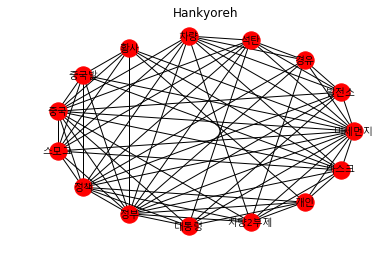

In [26]:
plt.title('Hankyoreh')
rcParams['font.family'] = 'Noto Sans Korean'
font_name = 'Malgun Gothic'
pos=nx.shell_layout(G)
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, font_family=font_name, font_size=10)

In [ ]:
plt.title('Hankyoreh')
rcParams['font.family'] = 'Noto Sans Korean'
font_name = 'Malgun Gothic'
pos=nx.shell_layout(G)
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, font_family=font_name, font_size=10)